In [1]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from Bio.Align.Applications import ClustalOmegaCommandline


In [2]:
os.listdir('sequences/') # show fasta files to import:

['all.fasta',
 'cov_sapiens.fasta',
 'seq_analysis',
 'cov_apodemus.fasta',
 '._cov_Rhinolophus.fasta',
 '._.DS_Store',
 'aligned.fasta',
 'cov_mers.fasta',
 'cov_manis.fasta',
 '._cov_sapiens.fasta',
 'cov_Rhinolophus.fasta',
 '._cov_anatidae.fasta',
 '._cov_manis.fasta',
 '._cov_apodemus.fasta',
 'country_data',
 '._aligned.fasta',
 '._cov_mers.fasta',
 'test',
 '._cov_gallus.fasta',
 'aligned.aln',
 'cov_gallus.fasta',
 '.DS_Store',
 '._all.fasta',
 'aligned2.fasta',
 'cov_anatidae.fasta']

# Read the data from fasta files:
<br>
<br>
Here we explore several string of the Coronaviridae familly from different host species: 
<br>

-------------------------------------------------
| Code:      | host:              |             |
|------------|--------------------|-------------|
| MN996528   |  Homo Sapiens      | SARS-CoV-2  |
|            |                    |             |
| NC_019843  |  Homo Sapiens      | MERS-CoV    |
|            |                    |             |
| JQ065048   |  Anatidae          |             |
|            |                    |             |
| MG772934   | Rhinolophus        |             |
|            |                    |             |
| NC_034972  | Apodemus chevrieri |             |
|            |                    |             |
| KX38909    | Gallus gallus      |             |
|            |                    |             |
| MT084071   | Manis javanica     |             |
|            |                    |             |


<br>


Gallus: Chicken, covid19: H. Sapiens, Rhinolophus: Bat, Anatidae: Duck, Mers: H. Sapiens MERS.

<br>

*The data can be downloaded here:* https://www.ncbi.nlm.nih.gov/labs/virus/vssi/

<br>




In [6]:
gallus = SeqIO.read("sequences/cov_gallus.fasta", "fasta") #Chicken
covid19 = SeqIO.read("sequences/cov_sapiens.fasta", "fasta") #H. Sapiens Covid-19
rhinolophus = SeqIO.read("sequences/cov_Rhinolophus.fasta", "fasta") #Bat
anatidae = SeqIO.read("sequences/cov_anatidae.fasta", "fasta")# Duck/swan
mers = SeqIO.read('sequences/cov_mers.fasta', 'fasta') # H. Sapiens MERS
apodemus = SeqIO.read('sequences/cov_apodemus.fasta', 'fasta') #Apodemus chevrieri
manis=SeqIO.read('sequences/cov_manis.fasta', 'fasta')#Manis javanica

#Create string sequence exemple:
#print(str(gallus.seq))
list_rec=[gallus, covid19, rhinolophus, anatidae, mers, apodemus, manis]

In [7]:
SeqIO.write(list_rec, "sequences/all.fasta", "fasta")

7

# Alignement
<br>
<br>
Performed using clustral, 
be sure to download the binaries from http://www.clustal.org/omega/
<br>
<br>
the binary file must be saved in the same folder as the execution file (this one) and permission must be adapted (for Linux/MAC: chmod 777 clustal-omega-1.2.3-macosx  Change the binary file name with the one corresponding to your download)

In [12]:
## Test:
from Bio.Align.Applications import ClustalwCommandline
clustalw_exe = '/home/simon/binaries/clustalo-1.2.4-Ubuntu-x86_64'
ccli = ClustalwCommandline(clustalw_exe, infile="sequences/all.fasta", outfile="sequences/aligned.aln")

ccli()

('Using 8 threads\nRead 7 sequences (type: DNA) from sequences/all.fasta\nnot more sequences (7) than cluster-size (100), turn off mBed\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 28)\nKtuple-distance calculation progress: 3 % (1 out of 28)\nKtuple-distance calculation progress: 7 % (2 out of 28)\nKtuple-distance calculation progress: 10 % (3 out of 28)\nKtuple-distance calculation progress: 14 % (4 out of 28)\nKtuple-distance calculation progress: 39 % (11 out of 28)\nKtuple-distance calculation progress: 53 % (15 out of 28)\nKtuple-distance calculation progress done. CPU time: 5.43u 0.01s 00:00:05.44 Elapsed: 00:00:02\nGuide-tree computation done.\nProgressive alignment progress: 16 % (1 out of 6)\nProgressive alignment progress: 33 % (2 out of 6)\nProgressive alignment progress: 50 % (3 out of 6)\nProgressive alignment progress: 66 % (4 out of 6)\nProgressive alignment progress: 83 % (5 out of 6)\nProgressive alignment progress: 100

In [5]:
# Define input file
in_file = "sequences/all.fasta"

# Define output file
out_file = "sequences/aligned.fasta"

# Get the command for Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True)

# Print the executable command
print(clustalomega_cline)

clustalo -i sequences/all.fasta -o sequences/aligned.fasta --auto -v


In [11]:
os.listdir('/home/simon/binaries/')
#/home/simon/binaries/
!chmod +x /home/simon/binaries/clustalo-1.2.4-Ubuntu-x86_64

In [12]:
!/home/simon/binaries/clustalo-1.2.4-Ubuntu-x86_64 -i sequences/all.fasta -o sequences/aligned.fasta --auto --force  -v

Using 8 threads
Read 7 sequences (type: DNA) from sequences/all.fasta
not more sequences (7) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 6 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 7 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 5.94u 0.00s 00:00:05.94 Elapsed: 00:00:02
mBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)
Distance calculation within sub-clusters done. CPU time: 5.97u 0.01s 00:00:05.98 Elapsed: 00:00:02
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 1349.04u 7.69s 00:22:36.73 Elapsed: 00:07:11
Iteration step 1 out of 1
Computing new guide tree (iteration step 5159681)
Calculating pairwise aligned identity distances...
Pair

In [11]:
align = AlignIO.read("sequences/aligned.fasta", "fasta")
print(align)

#seqs = AlignIO.read(’../../aoutput.aln’, ’clustal’)

ValueError: No records found in handle

# Calculate distance:

In [14]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

# Create the Phylogenetic Tree


Distance Matrix:
-----------------------
KX389094	0
MN996528	0.5353676890342001	0
MG772934	0.5392340028024287	0.09790336810420885	0
JQ065048	0.5693601120971509	0.6184026156001868	0.6185583060874981	0
NC_019843	0.5409206497483003	0.4571591675748612	0.46107737817219363	0.6423270538170118	0
NC_034972	0.5669469095438269	0.5641704291867766	0.5669988063729305	0.5717992630650267	0.5815818153510821	0
MT084071	0.5786755929212726	0.18646530696974417	0.20802843946234884	0.6364367637137371	0.5153355130001557	0.596268617987441	0
	KX389094	MN996528	MG772934	JQ065048	NC_019843	NC_034972	MT084071

Phylogenetic Tree:
-----------------------
   _________________________________________________________________ NC_034972
 ,|
 ||_________________________________________________________________ JQ065048
 |
_|           _______________________________________________________ NC_019843
 |    ______|
 |   |      |                                 ______________________ MT084071
 |   |      |___________________

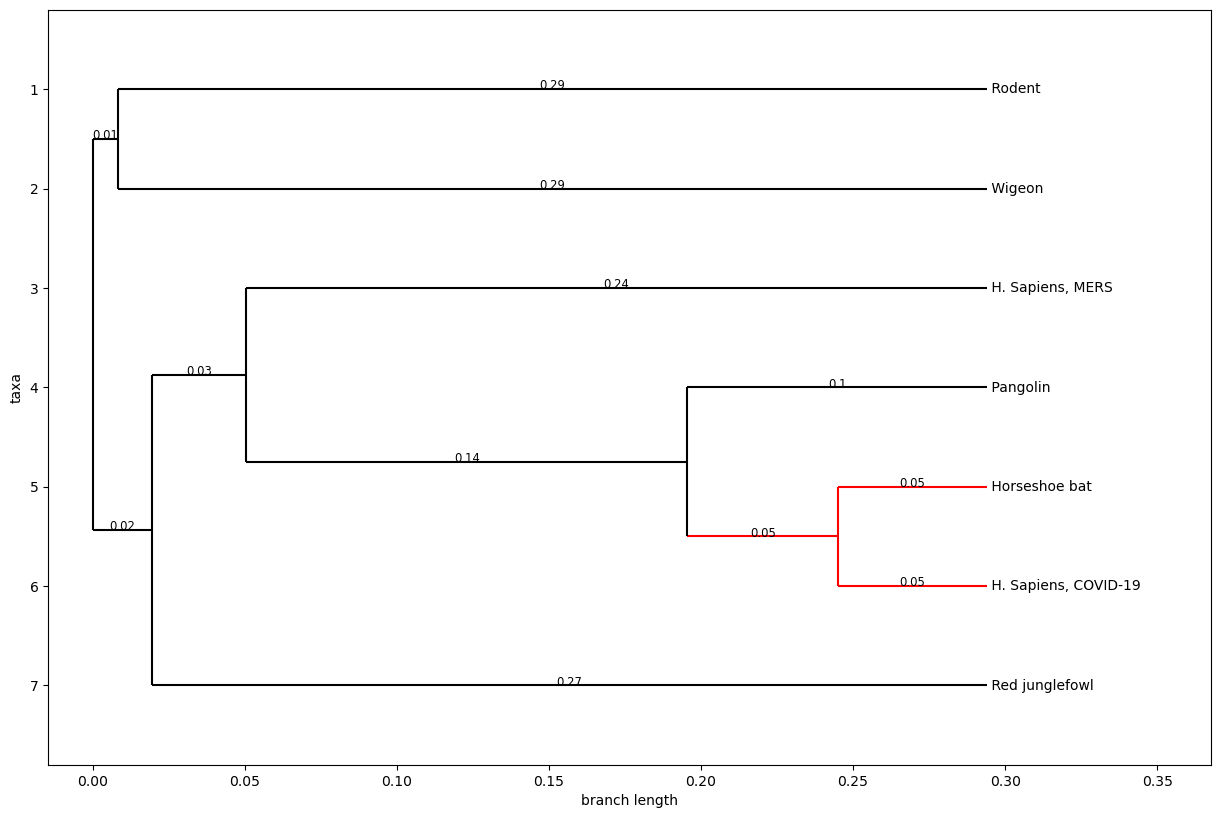

In [15]:



def get_label(leaf):
    code=['JQ065048', 'MN996528', 'NC_034972', 'NC_019843', 'KX389094', 'MG772934', 'MT084071']
    host=['Wigeon', 'H. Sapiens, COVID-19', 'Rodent', 'H. Sapiens, MERS', 'Red junglefowl', 'Horseshoe bat', 'Pangolin']
    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:
        
        for i in range(0, len(code)):
            if leaf.name==code[i]:
                name=host[i]
                return name
            
            #return ''
        #name=leaf.name

    #return name


print('\nDistance Matrix:\n-----------------------')
print(dm)

# Phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm) # We color the human strain, SARS and SARS-CoV-2 in blue
#tree.clade[1, 1, 0].color = "black"
mrca = tree.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
mrca.color = "red"

fig = plt.figure(figsize=(15, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
#Phylo.draw(tree, axes=axes, label_func=get_label)
Phylo.draw(tree, axes=axes, label_func=get_label, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
plt.savefig('tree.png')

print('\nPhylogenetic Tree:\n-----------------------')
Phylo.draw_ascii(tree)

In [16]:
Phylo.write(tree, 'example.nwk', 'newick')

1

<br>
<br>

# Readings from multiple alignements file:

<br>
<br>
Here we imported the alignement of differents strains SARS-CoV-2 from different countries directly from:
<br>
<br>
https://www.ncbi.nlm.nih.gov/labs/virus/vssi/
<br>
<br>
The alignement file is then read as a fasta file.


In [18]:

from Bio import SeqIO
from Bio import AlignIO

align = AlignIO.read("sequences/aligned.fasta", "fasta")


In [19]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

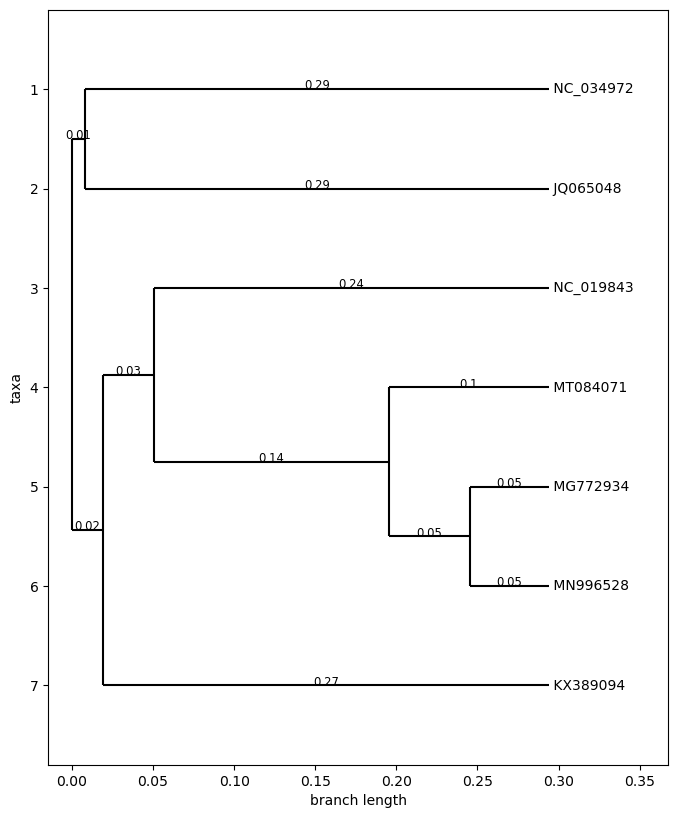

In [20]:

def get_label(leaf):
    if leaf.name.startswith('Inner'):
        name=''
    else:
        name=leaf.name

    return name

constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

fig = plt.figure(figsize=(8, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)

#Phylo.draw(tree, axes=axes, do_show=False)
Phylo.draw(tree, axes=axes, label_func=get_label, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
plt.savefig('tree2.png')


In [36]:
#records = list(SeqIO.parse('sequences/country_data/usa.fasta', "fasta"))
for seq in records:
    print(seq.name)
    seq.name='AAA'
    print(seq.description)
    #print(seq.seq)
#for seq in SeqIO.read('sequences/country_data/usa.fasta', 'fasta'):
#    print(seq)
#usa=SeqIO.read('sequences/country_data/usa.fasta', 'fasta')


SeqIO.write(end, "test.fasta", "fasta")

AAA
MT188341 |Severe acute respiratory syndrome coronavirus 2 isolate USA/MN1-MDH1/2020| complete genome
AAA
MT188339 |Severe acute respiratory syndrome coronavirus 2 isolate USA/MN3-MDH3/2020| complete genome
AAA
MT188340 |Severe acute respiratory syndrome coronavirus 2 isolate USA/MN2-MDH2/2020| complete genome
AAA
MT184909 |Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CruiseA-22/2020| complete genome
AAA
MT184908 |Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CruiseA-21/2020| complete genome
AAA
MT184911 |Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CruiseA-24/2020| complete genome
AAA
MT184913 |Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CruiseA-26/2020| complete genome
AAA
MT184907 |Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CruiseA-19/2020| complete genome
AAA
MT184912 |Severe acute respiratory syndrome coronavirus 2 isolate 2019-nCoV/USA-CruiseA-25/2020|

7

In [37]:
in_file = "test.fasta"

# Define output file
out_file = "aligned_test.fasta"

# Get the command for Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True)
# Print the executable command
print(clustalomega_cline)

clustalo -i test.fasta -o aligned_test.fasta --auto -v


In [38]:
!./clustal-omega-1.2.3-macosx -i test.fasta -o aligned_test.fasta --auto --force  -v

Using 8 threads
Read 7 sequences (type: DNA) from test.fasta
not more sequences (7) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 6 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 7 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 8.91u 0.02s 00:00:08.93 Elapsed: 00:00:02
mBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)
Distance calculation within sub-clusters done. CPU time: 8.90u 0.02s 00:00:08.92 Elapsed: 00:00:03
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 568.91u 17.77s 00:09:46.67 Elapsed: 00:06:28
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Calculating pairwise aligned identity distances...
Pairwise identity c

In [ ]:
align = AlignIO.read("aligned_test.fasta", "fasta")
print(align)

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)


constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

#mrca = tree.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
#mrca.color = "red"

fig = plt.figure(figsize=(15, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
#Phylo.draw(tree, axes=axes, label_func=get_label)
Phylo.draw(tree, axes=axes, branch_labels=lambda c: round(c.branch_length, 2), do_show=False)
#plt.savefig('tree.png')

print('\nPhylogenetic Tree:\n-----------------------')
Phylo.draw_ascii(tree)



In [22]:
records = list(SeqIO.parse('sequences/country_data/spain.fasta', "fasta"))
for seq in records:
    print(seq.name)
    print(seq.description)

MT077125
MT077125 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ITA/INMI1/2020| complete genome
MT292571
MT292571 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valencia12/2020| complete genome
MT292570
MT292570 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valencia17/2020| complete genome
MT292573
MT292573 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valencia14/2020| complete genome
MT292575
MT292575 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valencia16/2020| complete genome
MT292572
MT292572 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valencia11/2020| complete genome
MT292574
MT292574 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valencia15/2020| complete genome
MT292569
MT292569 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ESP/Valenc

<br>
<br>

## Molecular clock analysis:

<br>
We will be using a different python package called phylo treetime which can be installed using the following comand:

<br>

pip install phylo-treetime  

<br>
Related article:
<br>
<br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5758920/
<br>

In [11]:
from treetime import TreeTime
from treetime.utils import parse_dates

dates=parse_dates('ebola/metadata.csv')
tt=TreeTime(tree='ebola/ebola.nwk', aln='ebola/ebola.fasta', dates=dates)
tt.run(root='best')


Attempting to parse dates...
	Using column 'name' as name. This needs match the taxon names in the tree!!
	Using column 'date' as date.

0.00	-TreeAnc: set-up

1.38	-SequenceData: loaded alignment.

1.38	-SeqData: making compressed alignment...

3.77	-SequenceData: constructed compressed alignment...

4.14	-WARNING: character U is unknown. Treating it as missing information
4.14	--ClockTree: Setting precision to level 2

4.16	-ClockTree._assign_dates: assigned date contraints to 362 out of 362 tips.

4.16	-TreeTime._set_branch_length_mode: maximum branch length is 7.954e-04,
    	 using branch length mode joint

4.16	-TreeAnc.optimize_tree: sequences...

4.16	-TreeAnc.infer_ancestral_sequences with method: probabilistic, joint

4.16	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences of
    	tips at positions with AMBIGUOUS bases. This resulted in unexpected
    	behavior is some cases and is no longer done by default. If you want to
    	replace those ambiguous si

'success'

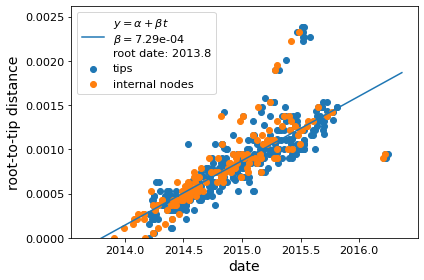

In [12]:
 tt.plot_root_to_tip(add_internal=True)

In [13]:
res = tt.run(root='best', infer_gtr=True, relaxed_clock=False, max_iter=2,
                    branch_length_mode='input', n_iqd=3, resolve_polytomies=True,
                    Tc='skyline', time_marginal="assign", vary_rate=True)


391.85	-TreeAnc.infer_ancestral_sequences with method: probabilistic, joint
391.85	--TreeAnc.infer_gtr: counting mutations...

392.60	-GTR: with alphabet: ['A', 'C', 'G', 'T', '-']
392.60	--GTR: ambiguous character: N

392.60	-GTR: model inference
392.60	--The model allows for gaps which are estimated to occur at a low
      	  fraction of 7.593e-03 this can potentially result in artificats. gap
      	  fraction will be set to 0.0100
392.60	--TreeAnc.infer_gtr: setting overall rate to 1.0...
392.61	--TreeAnc._ml_anc_joint: type of reconstruction: Joint

395.46	-TreeAnc.prune_short_branches: pruning short branches (max prob at
      	 zero)...

395.47	TreeTime.reroot: with method or node: least-squares

395.47	TreeTime.reroot: rerooting will ignore covariance and shared ancestry.
395.47	--TreeTime._find_best_root: searching for the best root position...
396.16	--TreeTime.reroot: Tree was re-rooted to node NODE_0000063
396.32	--ClockTree.date2dist: Setting new molecular clock. rate=7.7

428.49	---TreeTime._poly.cost_gain: optimization of gain failed
428.49	---TreeTime._poly.cost_gain: optimization of gain failed
428.49	---TreeTime._poly.cost_gain: optimization of gain failed
428.49	---TreeTime._poly.cost_gain: optimization of gain failed
428.50	---TreeTime._poly.cost_gain: optimization of gain failed
428.50	---TreeTime._poly.cost_gain: optimization of gain failed
428.50	---TreeTime._poly.cost_gain: optimization of gain failed
428.50	---TreeTime._poly.cost_gain: optimization of gain failed
428.52	---TreeTime._poly.cost_gain: optimization of gain failed
428.52	---TreeTime._poly.cost_gain: optimization of gain failed
428.52	---TreeTime._poly.cost_gain: optimization of gain failed
428.52	---TreeTime._poly.cost_gain: optimization of gain failed
428.53	---TreeTime._poly.cost_gain: optimization of gain failed
428.53	---TreeTime._poly.cost_gain: optimization of gain failed
428.53	---TreeTime._poly.cost_gain: optimization of gain failed
428.53	---TreeTime._poly.cost_gain: opti

429.55	---TreeTime._poly.cost_gain: optimization of gain failed
429.57	---TreeTime._poly.cost_gain: optimization of gain failed

429.75	-ClockTree: Maximum likelihood tree optimization with temporal
      	 constraints
429.75	--ClockTree.init_date_constraints...

429.75	-TreeAnc.infer_ancestral_sequences with method: probabilistic, joint
429.75	--TreeAnc._ml_anc_joint: type of reconstruction: Joint
433.97	--ClockTree.date2dist: Setting new molecular clock. rate=7.904e-04,
      	  R^2=0.8110
433.97	--ClockTree - Joint reconstruction:  Propagating leaves -> root...
460.22	--ClockTree - Joint reconstruction:  Propagating root -> leaves...

460.34	-TreeAnc.infer_ancestral_sequences with method: ml, joint
460.35	--TreeAnc._ml_anc_joint: type of reconstruction: Joint

463.58	###TreeTime.run: ITERATION 2 out of 2 iterations

463.58	-TreeTime.run: adding coalescent prior with Tc=skyline
463.67	--Coalescent:optimize_skyline:... current LH: 3046.301586
492.05	--Coalescent:optimize_skyline:...do

5434.30	--ClockTree.branch_length_to_years: setting node positions in units of
       	  years


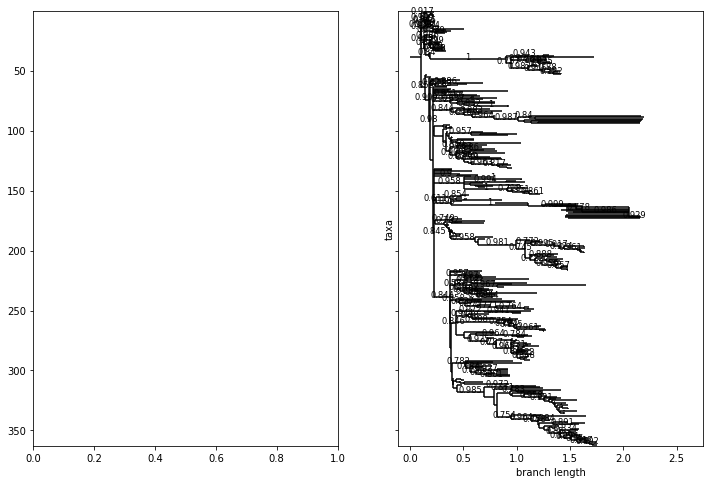

Substitution rate (mu): 1.0

Equilibrium frequencies (pi_i):
  A: 0.3137
  C: 0.2146
  G: 0.1984
  T: 0.2633
  -: 0.0099

Symmetrized rates from j->i (W_ij):
	A	C	G	T	-
  A	0	0.3199	1.9135	0.1997	16.1161
  C	0.3199	0	0.1776	2.6889	34.0565
  G	1.9135	0.1776	0	0.3248	18.6778
  T	0.1997	2.6889	0.3248	0	62.4344
  -	16.1161	34.0565	18.6778	62.4344	0

Actual rates from j->i (Q_ij):
	A	C	G	T	-
  A	0	0.1004	0.6003	0.0626	5.0563
  C	0.0686	0	0.0381	0.5769	7.3073
  G	0.3797	0.0352	0	0.0644	3.706
  T	0.0526	0.7081	0.0855	0	16.4418
  -	0.16	0.3382	0.1855	0.62	0



<Figure size 432x288 with 0 Axes>

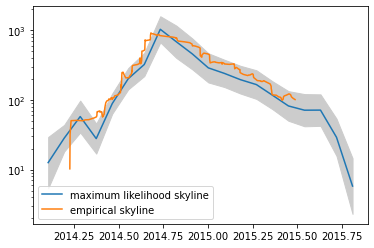

In [47]:
ebola=tt
from treetime import TreeTime
from treetime.utils import parse_dates
import treetime.config as ttconf

from treetime.treetime import plot_vs_years
fig, axs = plt.subplots(1,2, sharey=True, figsize=(12,8))
plot_vs_years(tt, step=1, ax=axs[1], confidence=(0.05,0.95), label_func = lambda x:"")
axs[1].set_xlim(0, 2.5)
axs[1].set_title("time tree")

axs[0].set_title("mutation tree")
for n in ebola.tree.find_clades():
    n.branch_length=n.mutation_length
Phylo.draw(ebola.tree, label_func=lambda x:"", axes=axs[0])
plt.tight_layout()

    # reset branch length to time (in substitution rate units)
for n in ebola.tree.find_clades():
    n.branch_length=n.clock_length

    # OUTPUT the GTR model
print(ebola.gtr)

    # plot Skyline
skyline, confidence = ebola.merger_model.skyline_inferred(gen=50, confidence=2.0)
skyline_empirical = ebola.merger_model.skyline_empirical(gen=50)
plt.figure()
plt.fill_between(skyline.x, confidence[0], confidence[1], color=(0.8, 0.8, 0.8))
plt.plot(skyline.x, skyline.y, label='maximum likelihood skyline')
plt.plot(skyline_empirical.x, skyline_empirical.y, label='empirical skyline')
plt.yscale('log')
plt.legend()
plt.ticklabel_format(axis='x',useOffset=False)

In [ ]:
#preferred formats are are “%Y-%m-%s” or numerical as in 2016.45